<h1>Irrigation Prediction</h1>

<h2>Importing Necessary Libraries</h2>

In [1]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
#from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Importing the dataset

In [2]:
# Load  the loan.csv file into a pandas dataframe
irrigation_data = pd.read_csv('Irrigation_dataset.csv')

## Inspecting the dataset

In [3]:
irrigation_data.shape

(501, 6)

In [4]:
irrigation_data.head(100)

,CropType,CropDays,SoilMoisture,temperature,Humidity,Irrigation
0,Wheat,10,400,30,15,0
1,Wheat,7,200,30,32,0
2,Wheat,9,300,21,28,0
3,Wheat,3,500,40,22,0
4,Wheat,2,700,23,34,0
...,...,...,...,...,...,...
95,Groundnuts,35,350,23,27,0
96,Groundnuts,37,678,27,20,1
97,Groundnuts,39,210,26,20,0
98,Groundnuts,41,430,25,19,0


In [5]:
irrigation_data['CropType'].unique()

array(['Wheat', 'Groundnuts', 'Garden Flowers', 'Maize', 'Paddy',
       'Potato', 'Pulse', 'Sugarcane', 'Coffee'], dtype=object)

In [6]:
irrigation_data.dtypes

CropType        object
CropDays         int64
SoilMoisture     int64
temperature      int64
Humidity         int64
Irrigation       int64
dtype: object

In [7]:
irrigation_data.describe()

,CropDays,SoilMoisture,temperature,Humidity,Irrigation
count,501.000000,501.000000,501.000000,501.000000,501.000000
mean,64.053892,411.391218,24.682635,39.381238,0.393214
std,45.935554,199.099590,12.111527,22.618231,0.488952
min,1.000000,120.000000,14.000000,11.000000,0.000000
25%,27.000000,230.000000,20.000000,19.000000,0.000000
50%,57.000000,369.000000,24.000000,32.000000,0.000000
75%,90.000000,554.000000,28.000000,65.000000,1.000000
max,210.000000,990.000000,263.000000,85.000000,1.000000


In [8]:
irrigation_data.isnull().sum()

CropType        0
CropDays        0
SoilMoisture    0
temperature     0
Humidity        0
Irrigation      0
dtype: int64

## Exploratory Data Analysis

Text(0, 0.5, 'count')

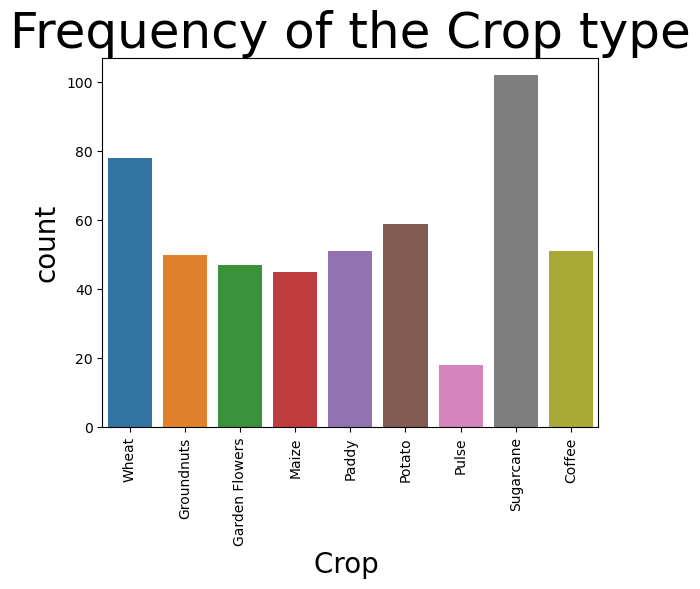

In [9]:
p = sns.countplot(x = irrigation_data['CropType'])
p.set_xticklabels(p.get_xticklabels(), rotation=90);
plt.title('Frequency of the Crop type', fontsize = 36)
plt.xlabel('Crop ', fontsize = 20)
plt.ylabel('count', fontsize = 20)

Text(0, 0.5, 'count')

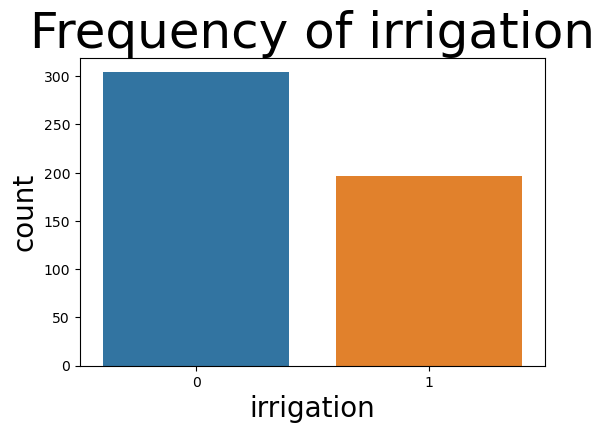

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x = irrigation_data['Irrigation'])
plt.title('Frequency of irrigation', fontsize = 36)
plt.xlabel('irrigation', fontsize = 20)
plt.ylabel('count', fontsize = 20)

Text(0, 0.5, 'count')

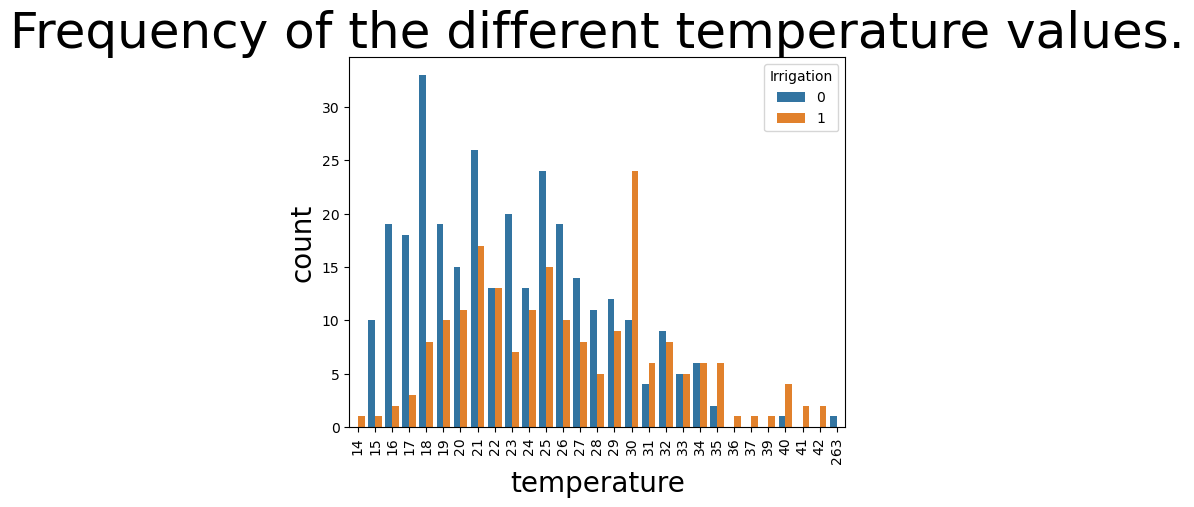

In [11]:
p = sns.countplot(x = irrigation_data['temperature'], hue=irrigation_data['Irrigation'])
p.set_xticklabels(p.get_xticklabels(), rotation=90);
plt.title('Frequency of the different temperature values.', fontsize = 36)
plt.xlabel('temperature', fontsize = 20)
plt.ylabel('count', fontsize = 20)

Text(0, 0.5, 'count')

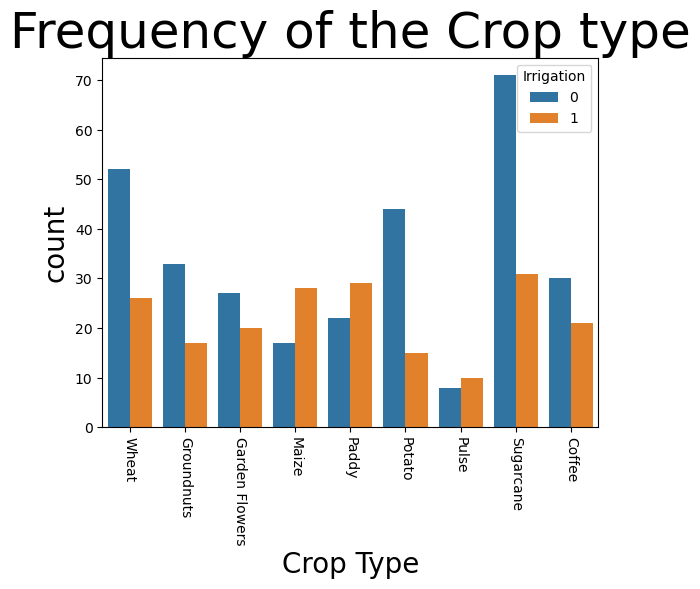

In [12]:
p = sns.countplot(x = irrigation_data['CropType'], hue=irrigation_data['Irrigation'])
p.set_xticklabels(p.get_xticklabels(), rotation=-90);
plt.title('Frequency of Crop type.', fontsize = 36)
plt.title('Frequency of the Crop type', fontsize = 36)
plt.xlabel('Crop Type', fontsize = 20)
plt.ylabel('count', fontsize = 20)

Text(0, 0.5, 'count')

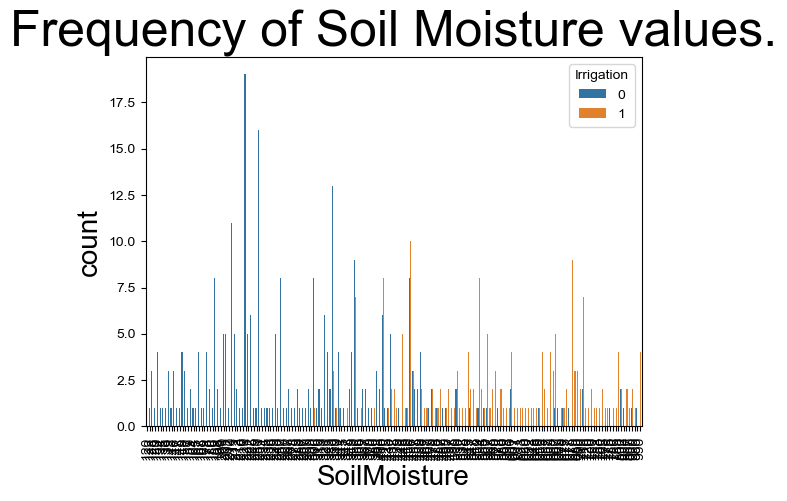

In [13]:
p = sns.countplot(x = irrigation_data['SoilMoisture'], hue=irrigation_data['Irrigation'])
p.set_xticklabels(p.get_xticklabels(), rotation=90)
plt.title('Frequency of Soil Moisture values.', fontsize = 36)
sns.set(rc={"figure.figsize":(20, 10)})
plt.xlabel('SoilMoisture', fontsize = 20)
plt.ylabel('count', fontsize = 20)

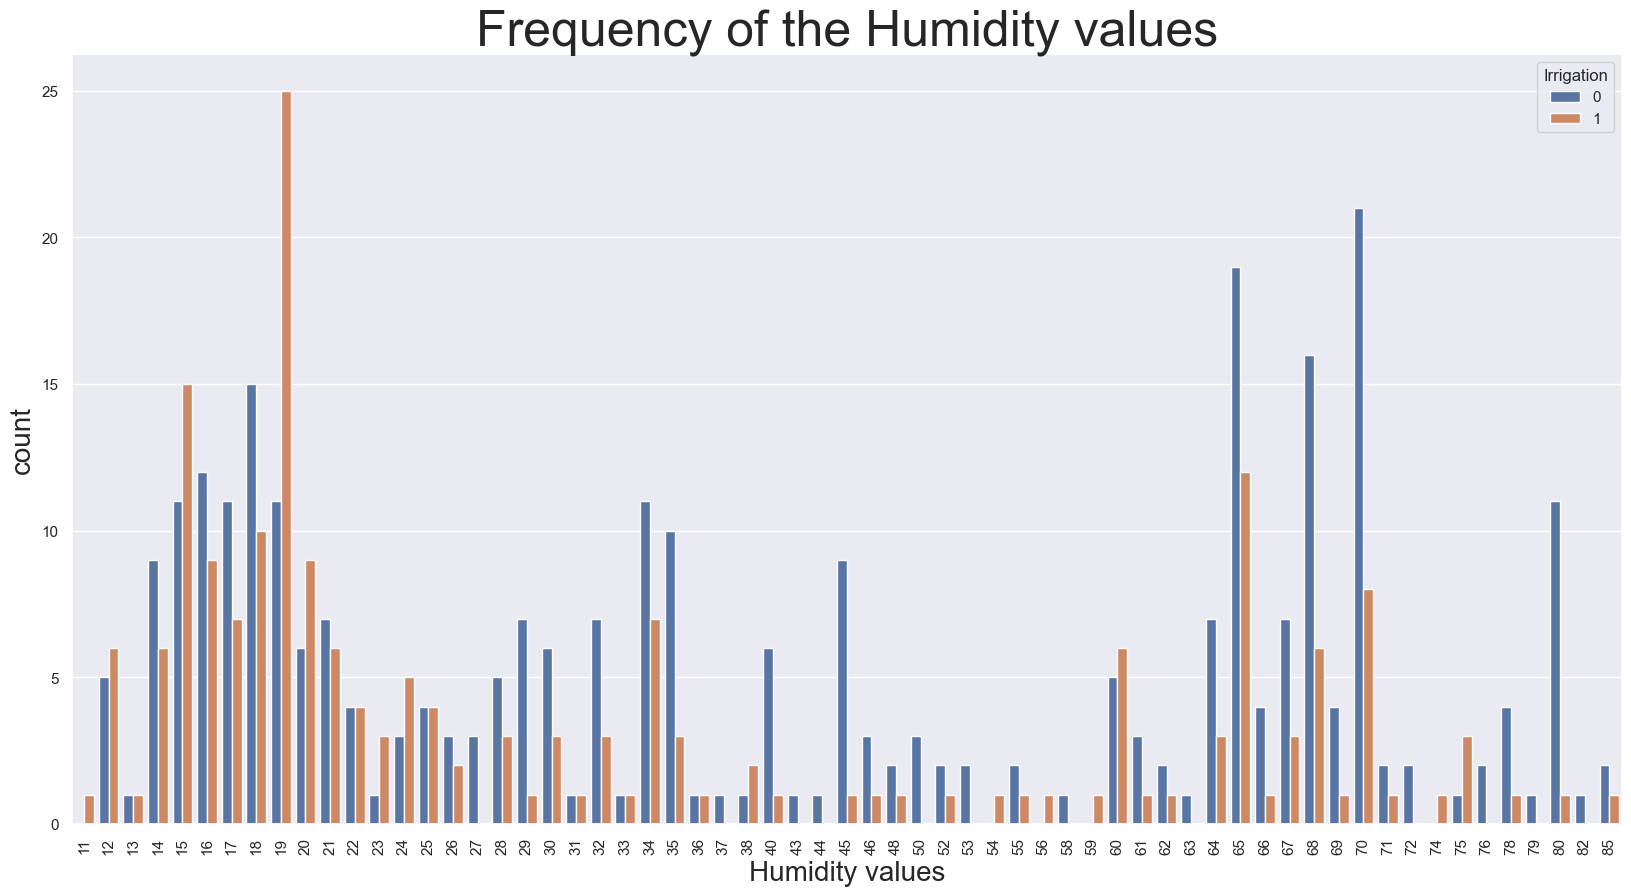

In [14]:
p = sns.countplot(x = irrigation_data['Humidity'], hue=irrigation_data['Irrigation'])
plt.title('Frequency of the Humidity values', fontsize = 36)
plt.xlabel('Humidity values', fontsize = 20)
plt.ylabel('count', fontsize = 20)
p.set_xticklabels(p.get_xticklabels(), rotation=90)
sns.set(rc={"figure.figsize":(25, 10)})

Text(0, 0.5, 'Temperature')

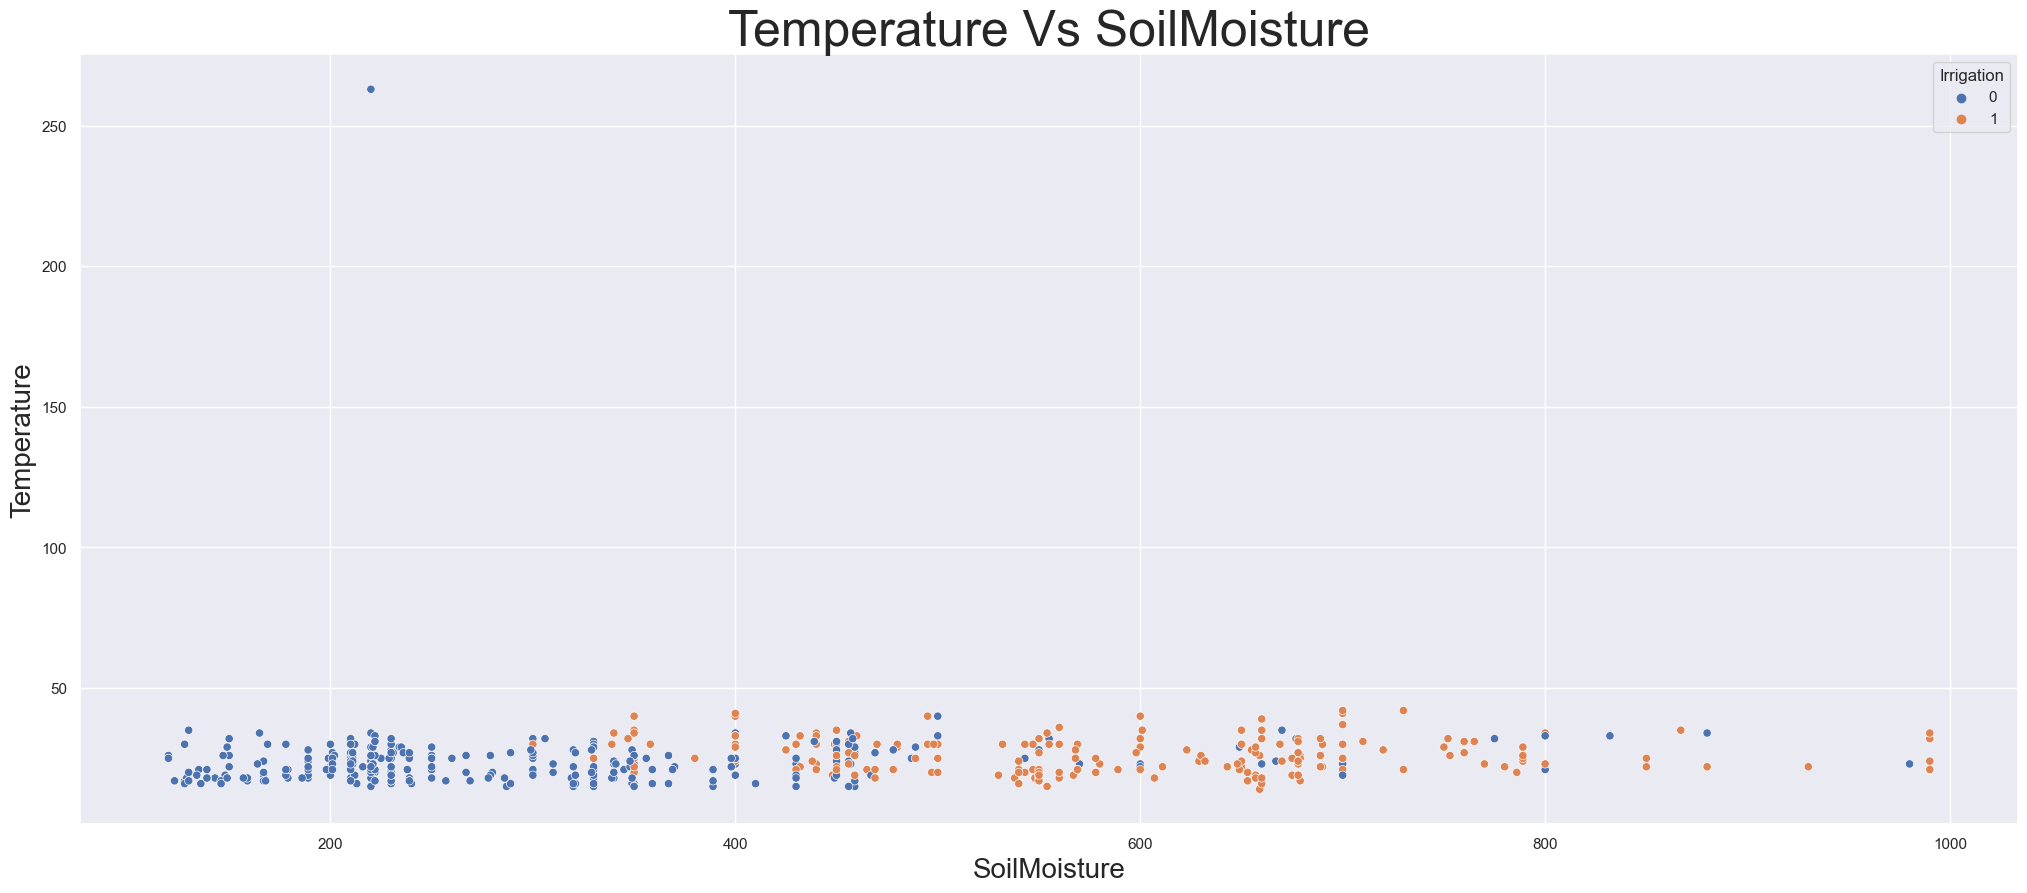

In [15]:
p = sns.scatterplot(x='SoilMoisture', y='temperature', hue='Irrigation', data=irrigation_data)
sns.set(rc={"figure.figsize":(20, 10)})
plt.title('Temperature Vs SoilMoisture', fontsize = 36)
plt.xlabel('SoilMoisture', fontsize = 20)
plt.ylabel('Temperature', fontsize = 20)

In [16]:
print(irrigation_data['temperature'].max())

263


In [17]:
irrigation_data = irrigation_data.drop(irrigation_data[irrigation_data['temperature']==263].index)

In [18]:
print(irrigation_data['temperature'].max())

42


Text(0, 0.5, 'Temperature')

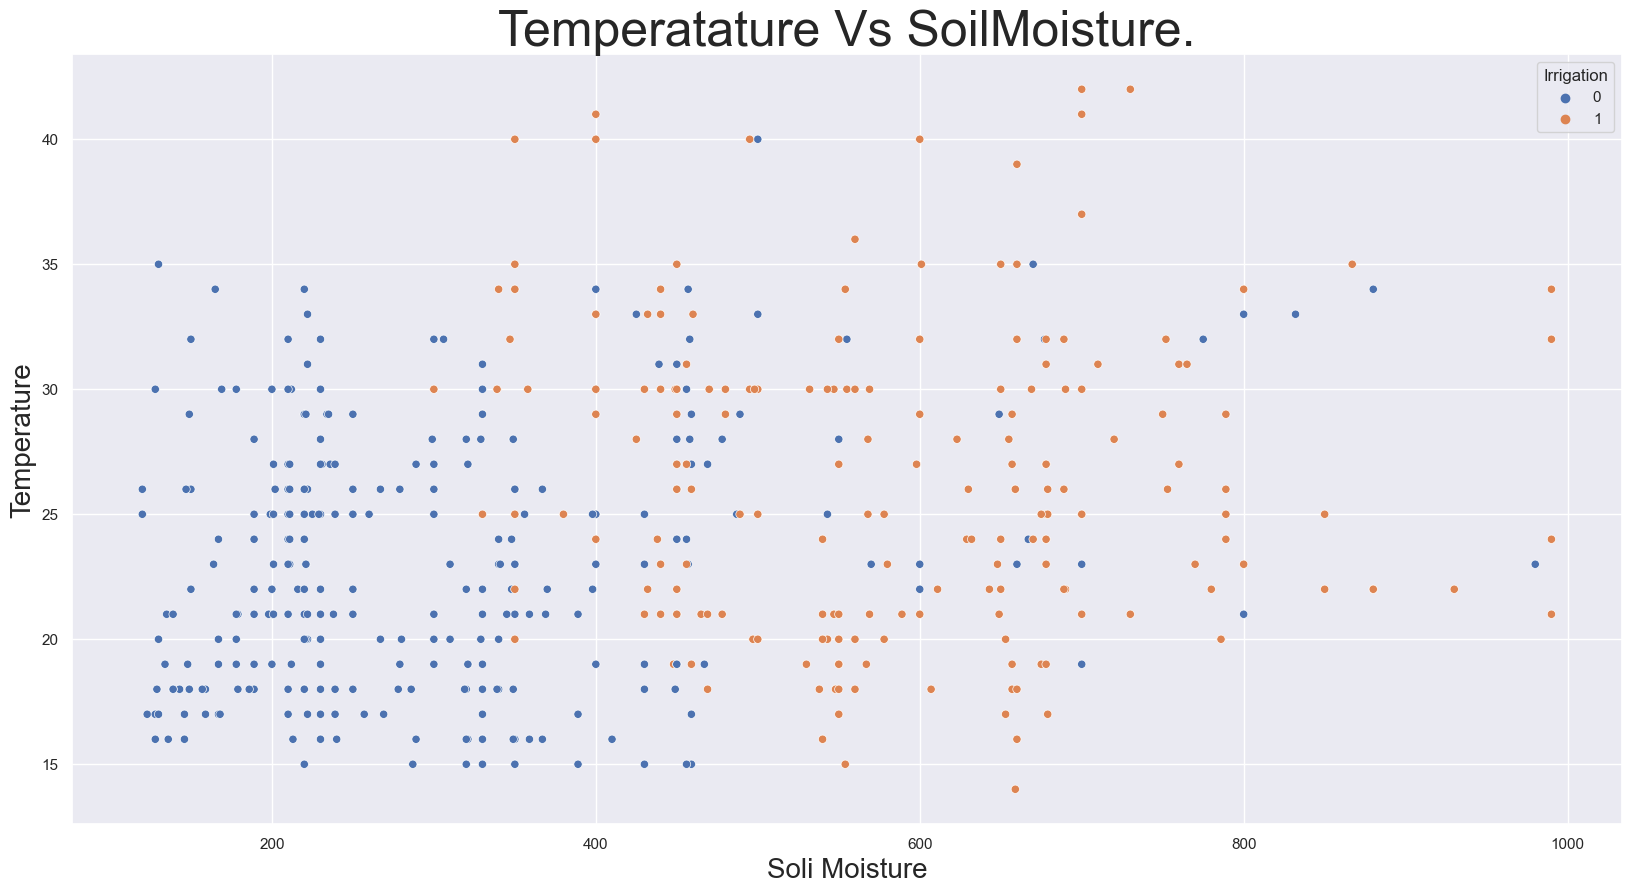

In [19]:
p = sns.scatterplot(x='SoilMoisture', y='temperature', hue='Irrigation', data=irrigation_data)
plt.title('Temperatature Vs SoilMoisture.', fontsize = 36)
plt.xlabel('Soli Moisture', fontsize = 20)
plt.ylabel('Temperature', fontsize = 20)

Text(0, 0.5, 'Crop days')

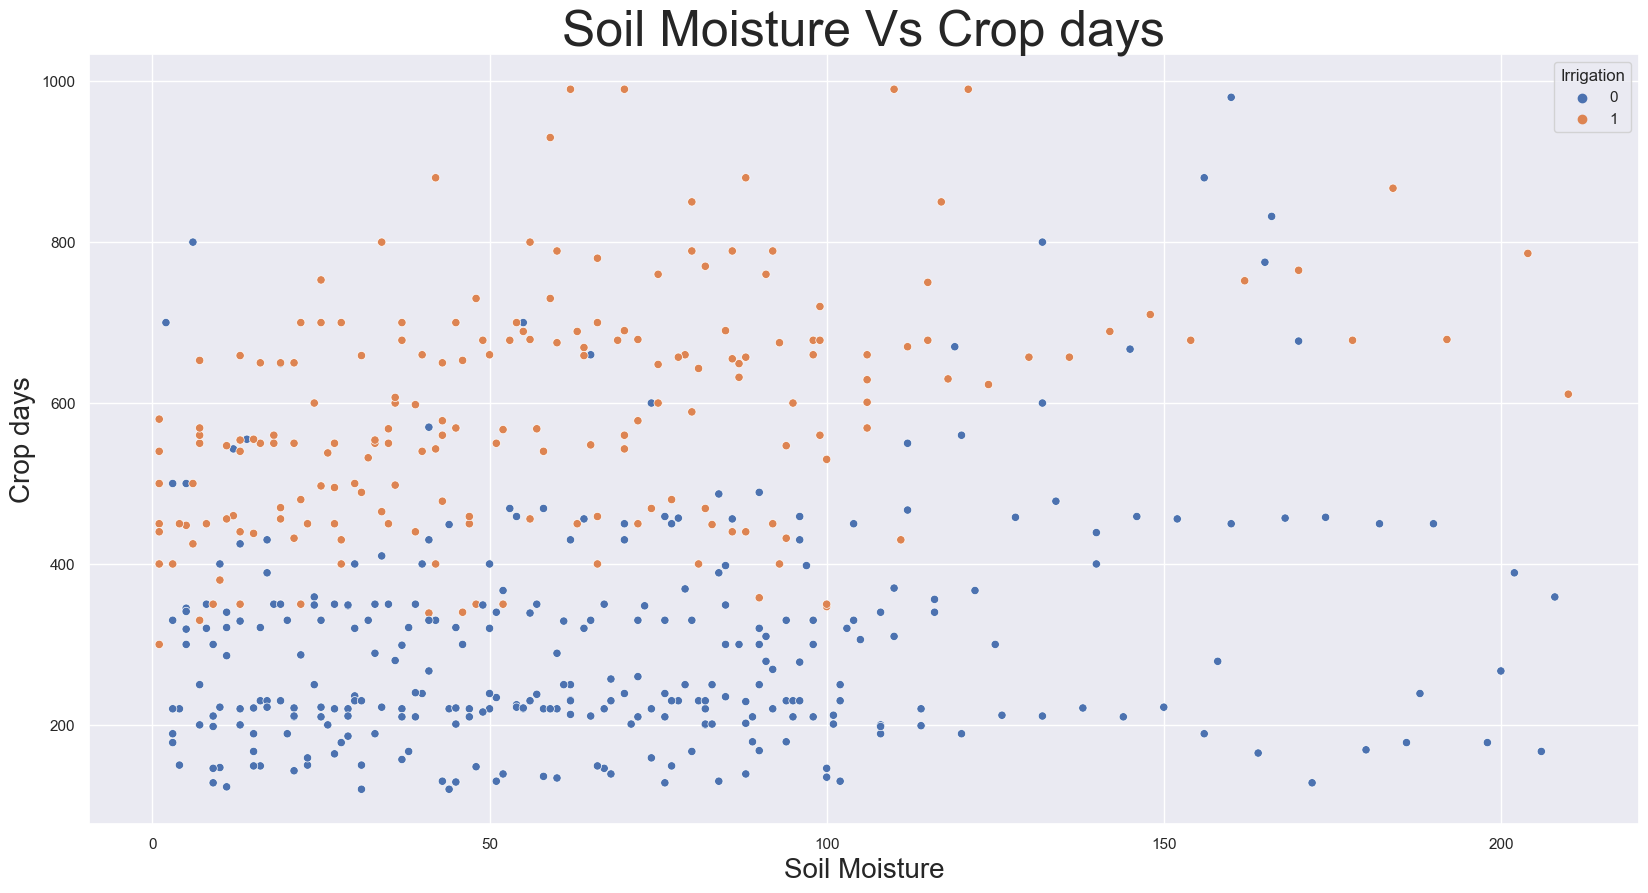

In [20]:
p = sns.scatterplot(x= 'CropDays',y='SoilMoisture', hue= 'Irrigation',data = irrigation_data)
p.set(title='Soil Moisture Vs Crop days.')
plt.title('Soil Moisture Vs Crop days', fontsize = 36)
plt.xlabel('Soil Moisture', fontsize = 20)
plt.ylabel('Crop days', fontsize = 20)
# From the scatter plot below, during the first 100 days of a crop, intense irrigation takesplace when soil moisture is 
# low and scarce when it is high.After 100days of crop life, scarce irrigation takesplace eventhough soil moisture is low.

Text(0, 0.5, 'Temperature')

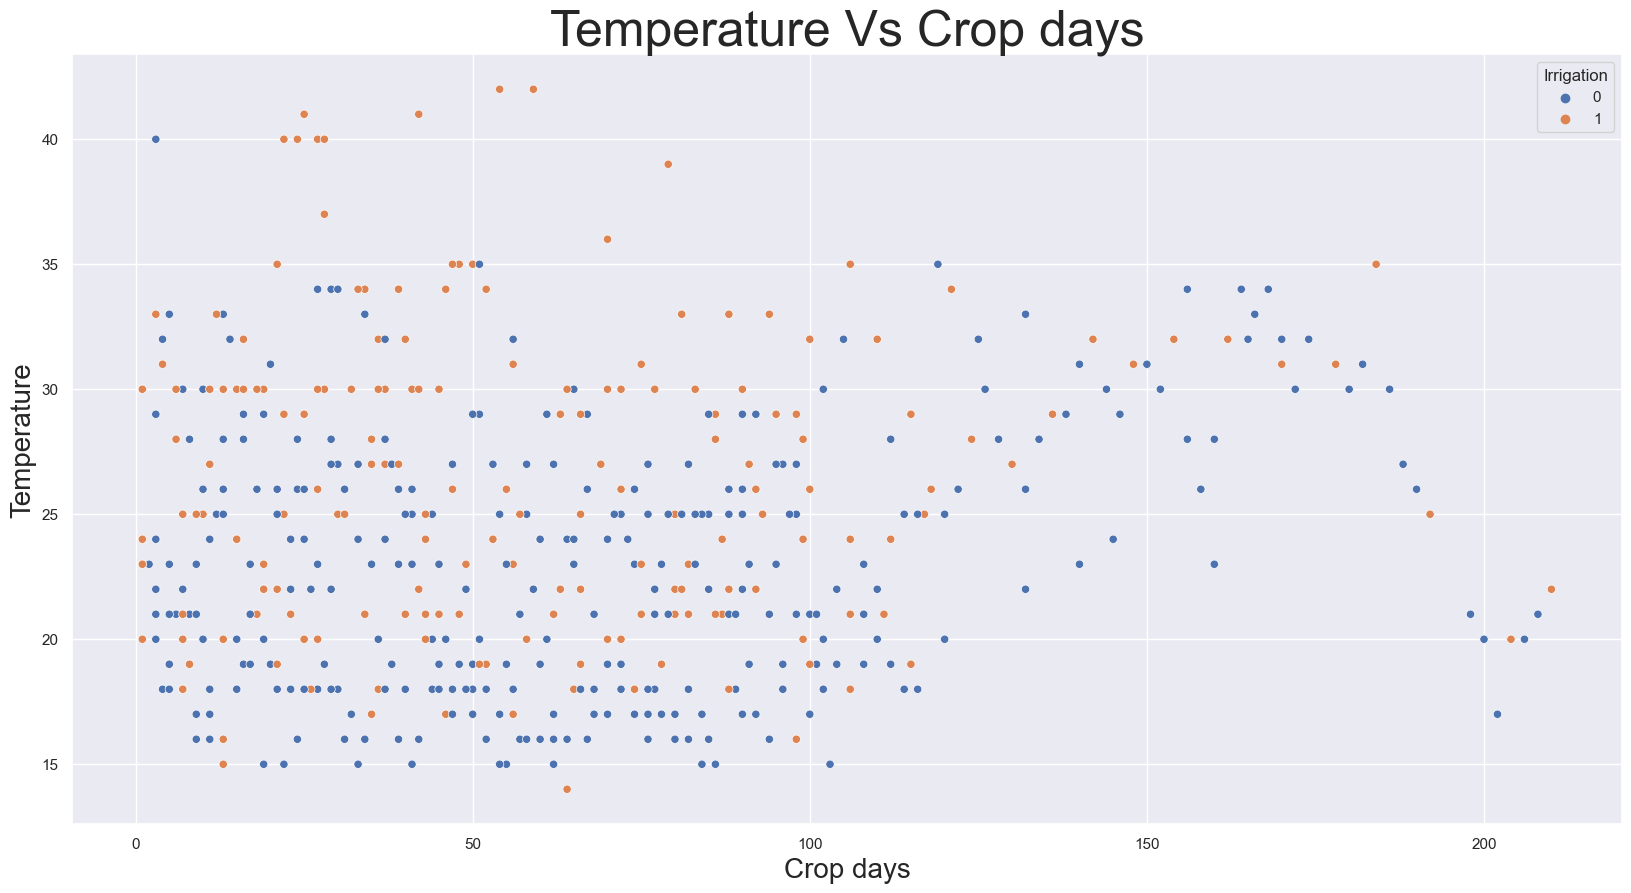

In [21]:
sns.scatterplot(x='CropDays', y='temperature', hue='Irrigation', data=irrigation_data)
plt.title('Temperature Vs Crop days', fontsize = 36)
plt.xlabel('Crop days', fontsize = 20)
plt.ylabel('Temperature', fontsize = 20)

Text(0, 0.5, 'Humidity')

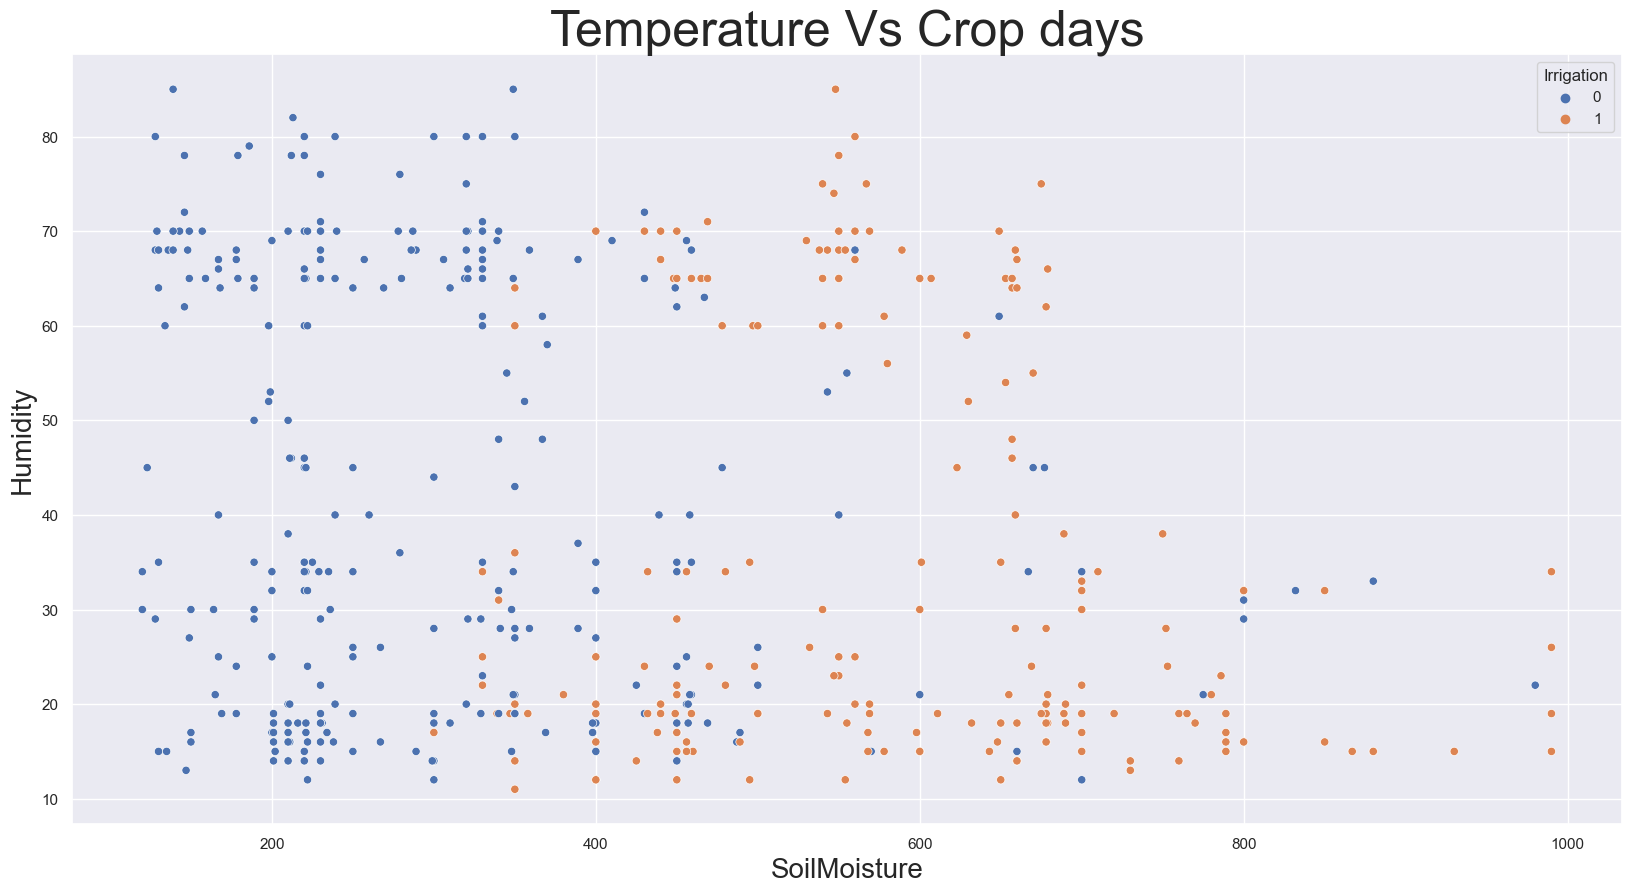

In [22]:
sns.scatterplot(x='SoilMoisture', y='Humidity', hue='Irrigation', data=irrigation_data)
plt.title('Temperature Vs Crop days', fontsize = 36)
plt.xlabel('SoilMoisture', fontsize = 20)
plt.ylabel('Humidity', fontsize = 20)

Text(43.31978443287035, 0.5, 'CropType')

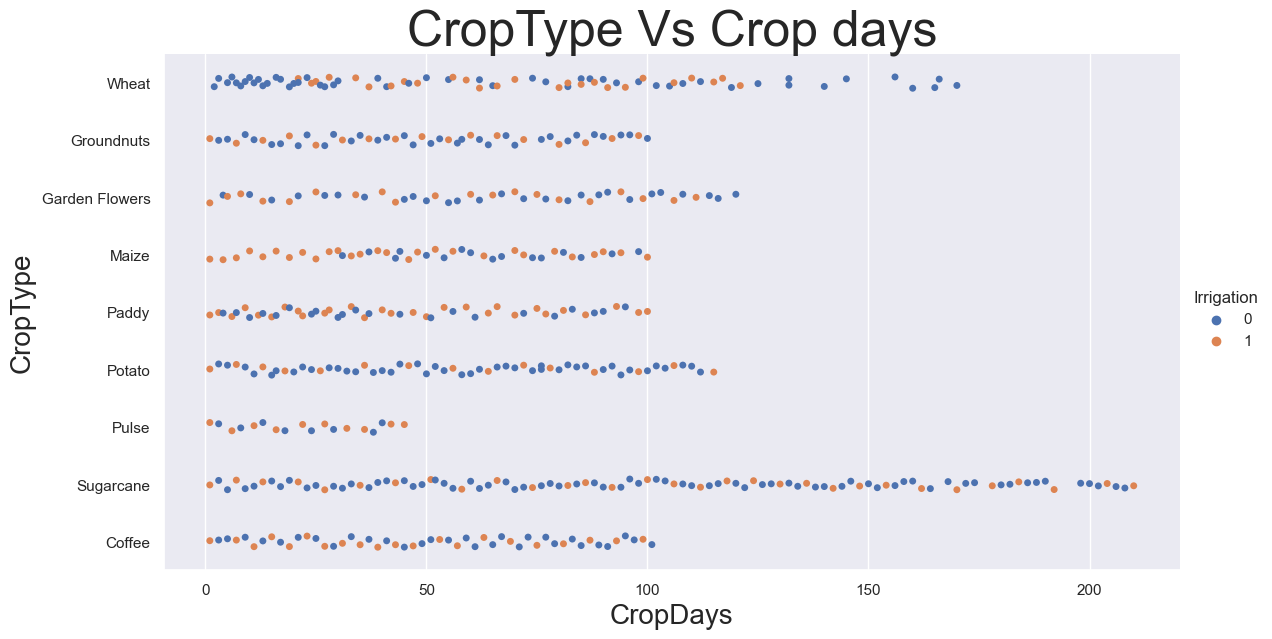

In [23]:
sns.catplot(data=irrigation_data, x="CropDays", y="CropType", hue='Irrigation', height=6, aspect=2)
plt.title('CropType Vs Crop days', fontsize = 36)
plt.xlabel('CropDays', fontsize = 20)
plt.ylabel('CropType', fontsize = 20)

Text(43.31978443287035, 0.5, 'CropType')

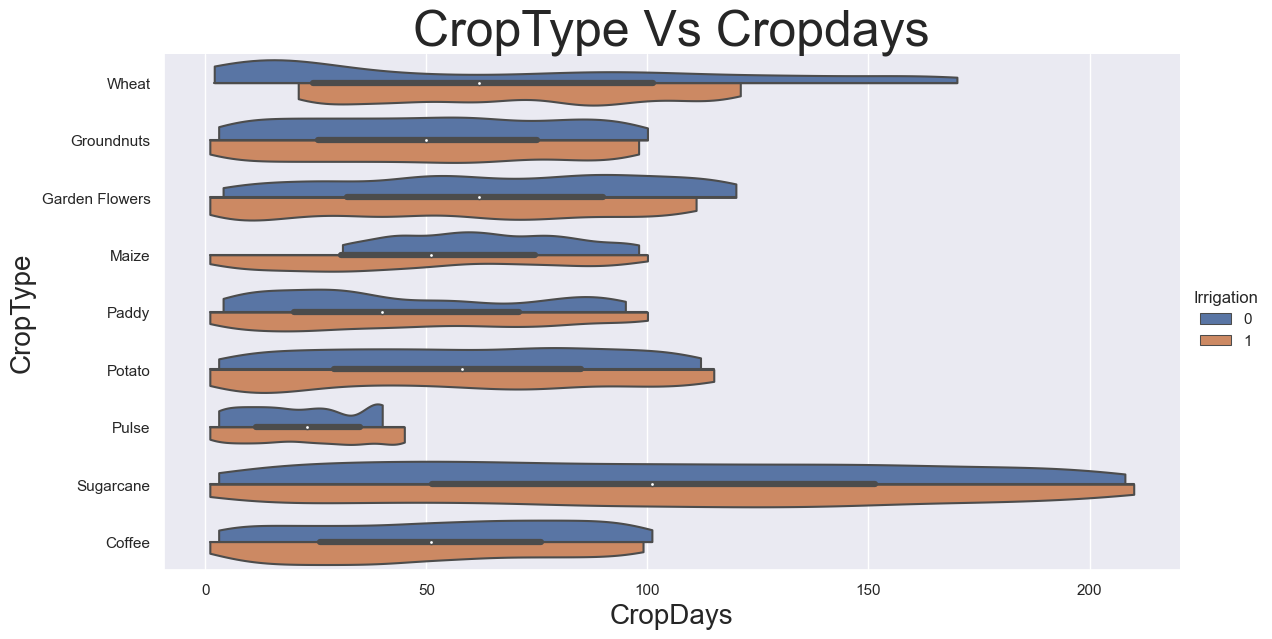

In [24]:
sns.catplot(
    data=irrigation_data, x="CropDays", y="CropType", hue="Irrigation",
    kind="violin", bw=.25, cut=0, split=True,
    height=6, aspect=2
)
plt.title('CropType Vs Cropdays', fontsize = 36)
plt.xlabel('CropDays', fontsize = 20)
plt.ylabel('CropType', fontsize = 20)

Text(43.31978443287035, 0.5, 'CropType')

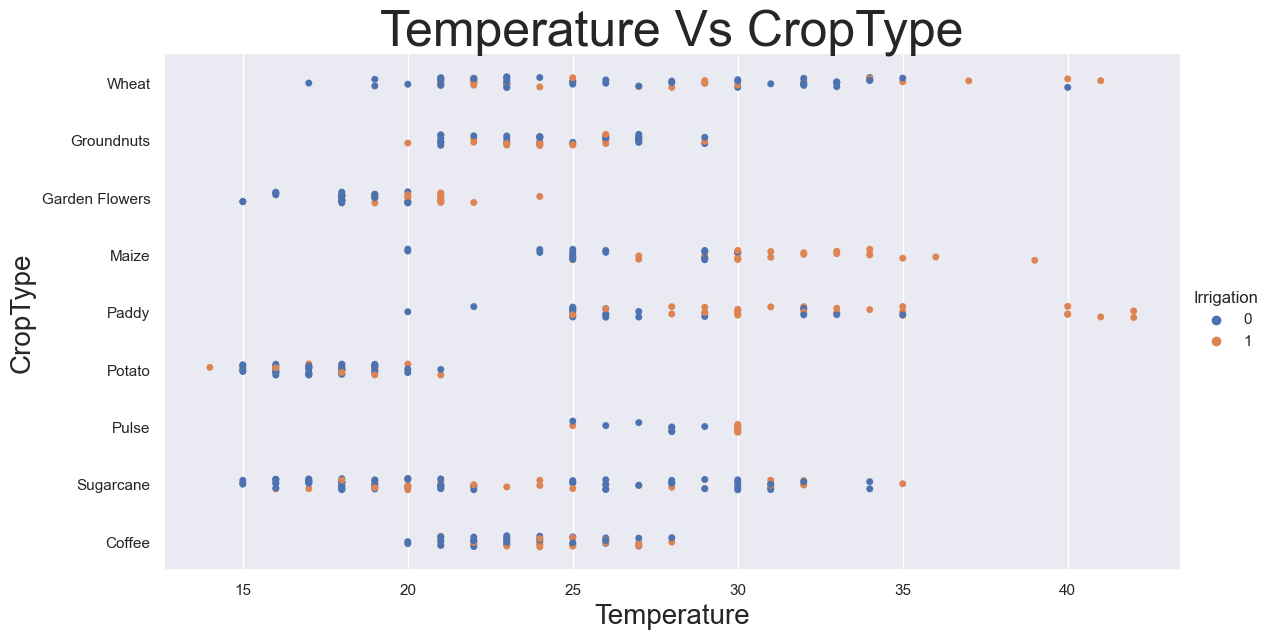

In [25]:
sns.catplot(data=irrigation_data, x="temperature", y="CropType", hue='Irrigation', height=6, aspect=2)
plt.title('Temperature Vs CropType', fontsize = 36)
plt.xlabel('Temperature', fontsize = 20)
plt.ylabel('CropType', fontsize = 20)

Text(43.31978443287035, 0.5, 'CropType')

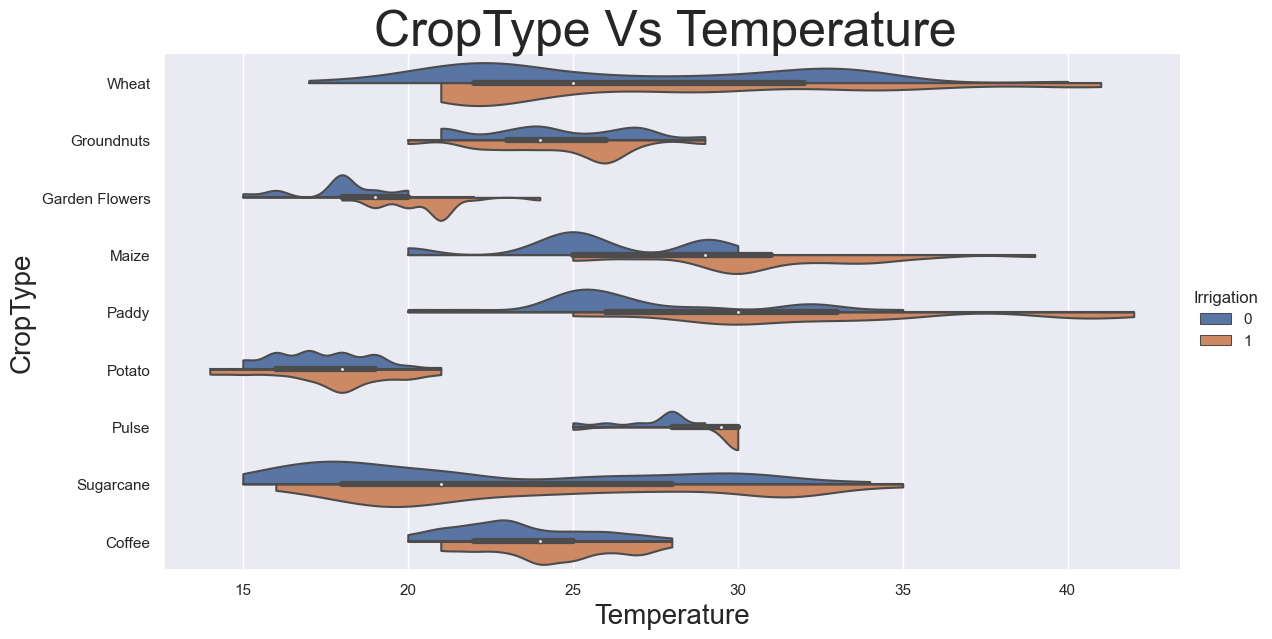

In [26]:
sns.catplot(
    data=irrigation_data, x="temperature", y="CropType", hue="Irrigation",
    kind="violin", bw=.25, cut=0, split=True,
    height=6, aspect=2
)
plt.title('CropType Vs Temperature ', fontsize = 36)
plt.xlabel('Temperature', fontsize = 20)
plt.ylabel('CropType', fontsize = 20)

Text(43.31978443287035, 0.5, 'CropType')

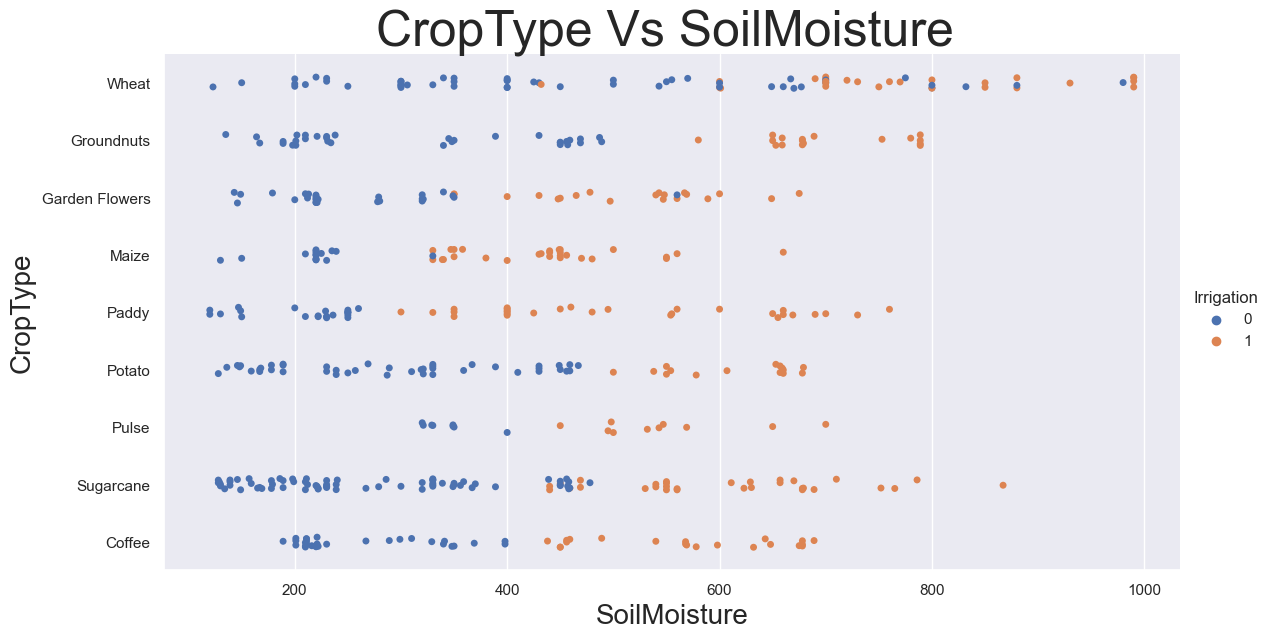

In [27]:
sns.catplot(data=irrigation_data, x="SoilMoisture", y="CropType", hue='Irrigation', height=6, aspect=2)
plt.title('CropType Vs SoilMoisture ', fontsize = 36)
plt.xlabel('SoilMoisture', fontsize = 20)
plt.ylabel('CropType', fontsize = 20)

In [28]:
irrigation_data['CropDays'].unique()

array([ 10,   7,   9,   3,   2,   6,   5,   8,  11,  12,  13,  14,  19,
        16,  17,  20,  21,  23,  24,  25,  26,  27,  28,  29,  30,  34,
        37,  39,  41,  42,  45,  46,  48,  50,  55,  56,  59,  62,  65,
        66,  70,  74,  77,  80,  82,  85,  87,  88,  90,  91,  93,  95,
        98,  99, 102, 105, 106, 108, 110, 112, 115, 117, 119, 121, 125,
       132, 140, 145, 156, 160, 165, 166, 170,   1,  15,  31,  33,  35,
        43,  47,  49,  51,  53,  57,  58,  60,  64,  68,  72,  76,  78,
        84,  86,  92,  94,  96, 100,   4,  36,  40,  52,  67,  75,  89,
       101, 103, 111, 114, 116, 120,  22,  44,  54,  63,  79,  81,  83,
        18,  61,  32,  38, 104, 118, 122, 124, 126, 128, 130, 134, 136,
       138, 142, 144, 146, 148, 150, 152, 154, 158, 162, 164, 168, 172,
       174, 178, 180, 182, 184, 186, 188, 190, 192, 198, 200, 202, 204,
       206, 208, 210,  69,  71,  73,  97], dtype=int64)

In [29]:
print(irrigation_data['CropDays'].max())

210


Text(0, 0.5, 'SoilMoisture')

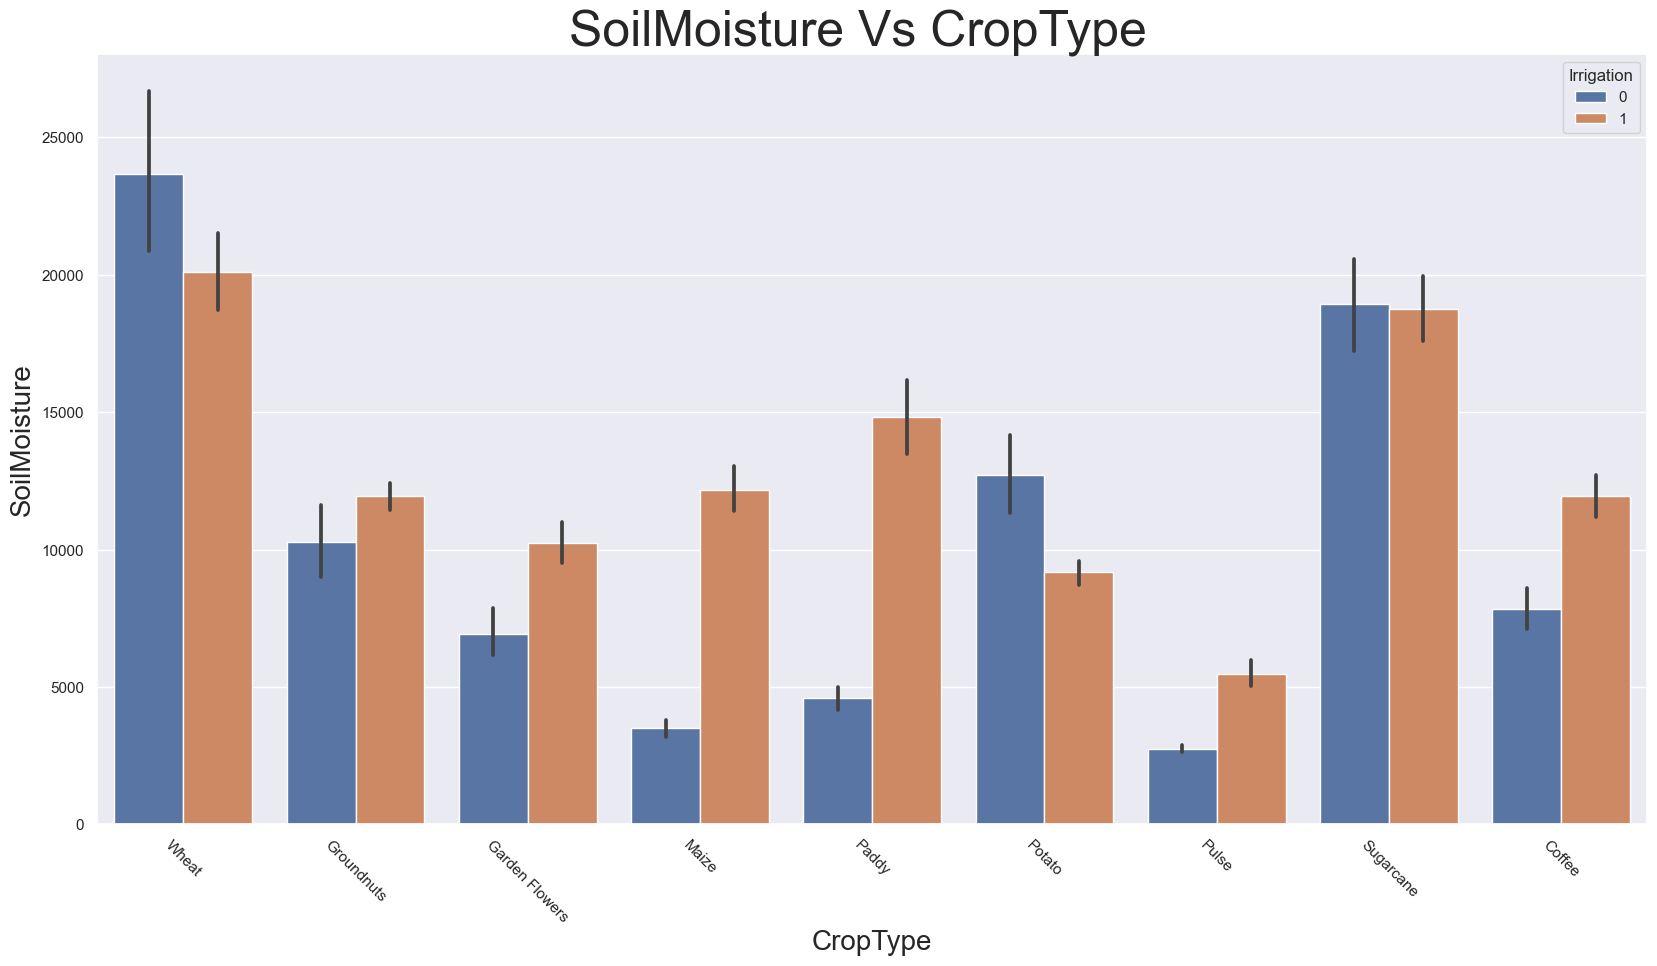

In [30]:
p = sns.barplot(x='CropType', y = 'SoilMoisture', data=irrigation_data, estimator=np.sum, hue='Irrigation');
p.set(title='Soil moisture vs crop type')
p.set_xticklabels(p.get_xticklabels(), rotation=-45);
sns.set(rc={"figure.figsize":(30, 20)})
plt.title('SoilMoisture Vs CropType  ', fontsize = 36)
plt.xlabel('CropType', fontsize = 20)
plt.ylabel('SoilMoisture', fontsize = 20)

Text(16.694444444444443, 0.5, 'Temperature')

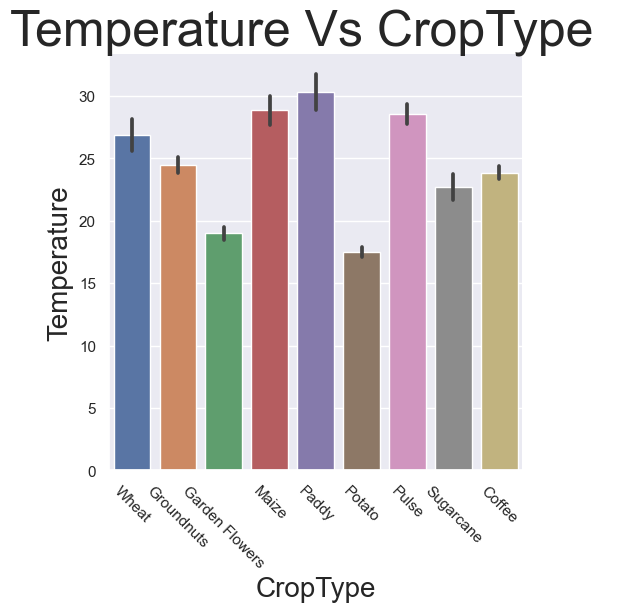

In [31]:
p = sns.catplot(
    data = irrigation_data, x= "CropType", y="temperature",
    kind="bar"
    )
plt.xticks(rotation=-45)
plt.title('Temperature Vs CropType  ', fontsize = 36)
plt.xlabel('CropType', fontsize = 20)
plt.ylabel('Temperature', fontsize = 20)

Text(37.50017270688657, 0.5, 'Temperature')

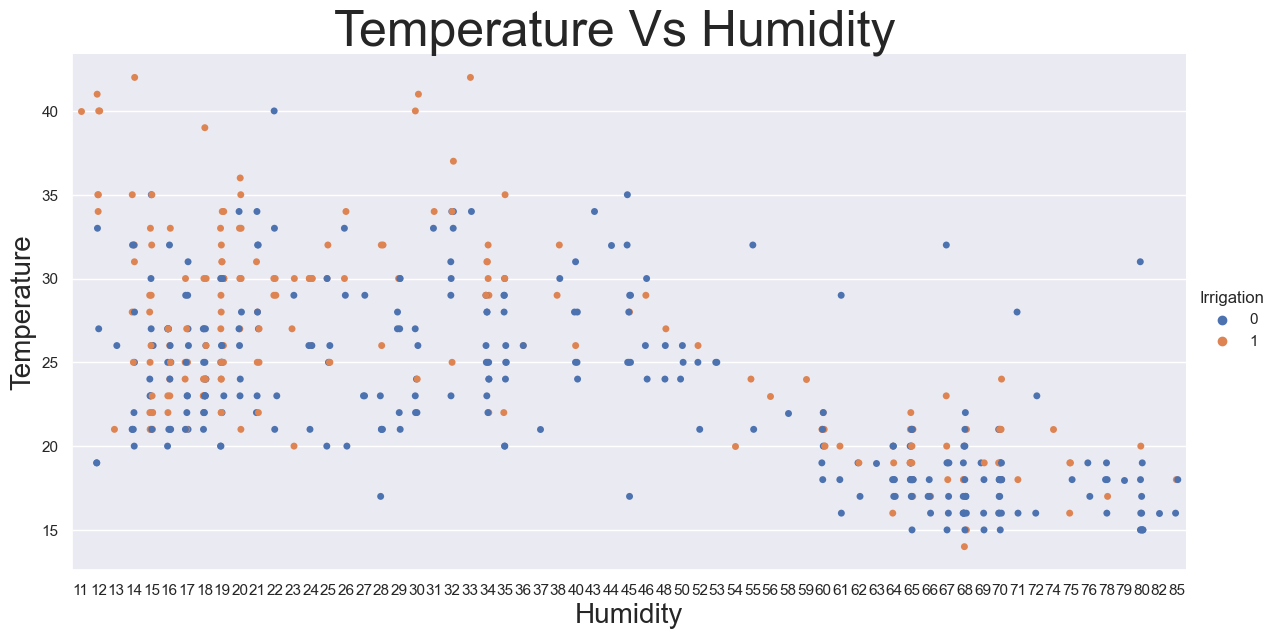

In [32]:
sns.catplot(data=irrigation_data, x="Humidity", y="temperature", hue='Irrigation', height=6, aspect=2)
plt.title('Temperature Vs Humidity  ', fontsize = 36)
plt.xlabel('Humidity', fontsize = 20)
plt.ylabel('Temperature', fontsize = 20)

In [33]:
# p = sns.barplot(x='CropType', y = 'temperature', data=irrigation_data, estimator=np.mean, hue='Irrigation');
# p.set(title='Temperature vs crop type')

## Seperating the target "irrigation" from the rest of the features

In [34]:
# separating features and target variable
x = irrigation_data[['CropType','CropDays', 'SoilMoisture', 'temperature']]
y = irrigation_data['Irrigation']

In [35]:
x.tail()

,CropType,CropDays,SoilMoisture,temperature
496,Coffee,93,675,25
497,Coffee,95,210,23
498,Coffee,97,398,25
499,Coffee,99,678,24
500,Coffee,101,201,21


In [36]:
x['CropType'] = x['CropType'].replace({'Wheat':0, 'Groundnuts':1, 'Garden Flowers':2, 'Maize':3, 'Paddy':4,
       'Potato':5, 'Pulse':6, 'Sugarcane':7, 'Coffee':8})


C:\Users\USER\AppData\Local\Temp\ipykernel_1116\4206319436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['CropType'] = x['CropType'].replace({'Wheat':0, 'Groundnuts':1, 'Garden Flowers':2, 'Maize':3, 'Paddy':4,


In [37]:
#x1 = x['CropType']
#x2 = x[columns=[[]'CropDays', 'SoilMoisture', 'temperature']]
#x = pd.concat([x1, x2], axis=1)

## One Hot Encoding "CropType" the categorical feature

In [38]:
#Inspecting our encoded data
x.tail(10)

,CropType,CropDays,SoilMoisture,temperature
491,8,83,201,23
492,8,85,398,22
493,8,87,632,24
494,8,89,210,21
495,8,91,310,23
496,8,93,675,25
497,8,95,210,23
498,8,97,398,25
499,8,99,678,24
500,8,101,201,21


## Scaling the data

In [39]:
from sklearn.preprocessing import MinMaxScaler
 # scale our data into range of 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)

import joblib
joblib.dump(scaler,'min_max_scaler.joblib')

['min_max_scaler.joblib']

In [40]:
print(x)

[[0.         0.0430622  0.32183908 0.57142857]
 [0.         0.02870813 0.09195402 0.57142857]
 [0.         0.03827751 0.20689655 0.25      ]
 ...
 [1.         0.45933014 0.31954023 0.39285714]
 [1.         0.46889952 0.64137931 0.35714286]
 [1.         0.4784689  0.09310345 0.25      ]]


# Split into test and train_data

In [41]:
# Split into test and train_data

x_Train, x_test, y_Train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
                                                  

# Split into train_data into evaluation and actually training data

In [42]:
# Split into evaluation and train_data

X_Train, x_val, Y_Train, y_val = train_test_split(x_Train, y_Train, stratify = y_Train, test_size = 0.1, random_state=42)

<h1>Training, Validating, Testing and Evaluating different Classifier Models</h1>

 <h2>XGBOOST MODEL</h2>

<h3>Importing and training the XGBClassifier</h3>

In [43]:
#import classifier algorithm here
from xgboost import XGBClassifier

# create models
xgb = XGBClassifier()

#fitting the models
xgb.fit(X_Train,Y_Train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

<h3>Validating and evaluating for the accurancy of the XGBClassifier</h3>

In [44]:
# import evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix

# evaluate the model
xgb_y = xgb.predict(x_val)

# Get error rate
print("Error rate of XGB classifier: ", 1 - accuracy_score(y_val, xgb_y))

Error rate of XGB classifier:  0.0


In [45]:
# Get confusion matrix for Gradient Boosting Classifier
print(confusion_matrix(y_val,xgb_y))

[[24  0]
 [ 0 16]]


<h3>Testing the trained XGBOOST model</h3>

In [46]:
test_prediction = xgb.predict(x_test)

In [47]:
# Get error rate
print("Error rate of XGB classifier: ", 1 - accuracy_score(y_test, test_prediction))

Error rate of XGB classifier:  0.06000000000000005


<h2>RANDOM FOREST CLASSIFIER</h2>

<h3>Training and evaluating a Random Forest Classifier Model</h3>

In [48]:
# importing the Random Forest Classifier from sklearn
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_Train,Y_Train)

RandomForestClassifier(random_state=42)

In [49]:
# Make predictions on the test data
rf_y_prediction = rf_classifier.predict(x_val)

# Evaluate the model
accuracy = accuracy_score(y_val, rf_y_prediction)
print("Error rate of random forest classifier: ", 1 - accuracy)

Error rate of random forest classifier:  0.025000000000000022


In [50]:
# Get confusion matrix for Random Forest Classifier model
print(confusion_matrix(y_val,rf_y_prediction))

[[23  1]
 [ 0 16]]


In [51]:
#print(rf_classifier.predict([0.1, 0.0430622,  0.32183908, 0.57142857]))

<h3>Testing the performance of the Random Forest Classifier Model</h3>

In [52]:
RF_prediction = rf_classifier.predict(x_test)
# Get error rate
print("Error rate of Random Forest classifier: ", 1 - accuracy_score(y_test, RF_prediction))

Error rate of Random Forest classifier:  0.07999999999999996


In [53]:
# Get confusion matrix for Random Forest Classifier model
print(confusion_matrix(y_test,RF_prediction))

[[62  6]
 [ 2 30]]


In [54]:
#Get classification report
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,RF_prediction, target_names=['No irrigation','Irrigation']))

               precision    recall  f1-score   support

No irrigation       0.97      0.91      0.94        68
   Irrigation       0.83      0.94      0.88        32

     accuracy                           0.92       100
    macro avg       0.90      0.92      0.91       100
 weighted avg       0.93      0.92      0.92       100



In [55]:
# Saving model
joblib.dump(rf_classifier,'RFC_model.joblib')

['RFC_model.joblib']

<h2>LOGISTIC REGRESSION MODEL</h2>

<h3>Importing and training the LogisticRegression model</h3>

In [56]:
from sklearn.linear_model import LogisticRegression
lrModel = LogisticRegression()
lrModel.fit(X_Train,Y_Train)

LogisticRegression()

<h3>Testing for the accurancy of the LogisticRegression model</h3>

In [57]:
# evaluate the model
lr_y = lrModel.predict(x_val)

# Get error rate
print("Error rate of Logistic Regression Model: ", 1 - accuracy_score(y_val, lr_y))

Error rate of Logistic Regression Model:  0.125


In [58]:
from sklearn.metrics import classification_report
#Get classification report
print(classification_report(y_test,test_prediction, target_names=['No irrigation','Irrigation']))

               precision    recall  f1-score   support

No irrigation       0.97      0.94      0.96        68
   Irrigation       0.88      0.94      0.91        32

     accuracy                           0.94       100
    macro avg       0.93      0.94      0.93       100
 weighted avg       0.94      0.94      0.94       100



<h2>SMV CLASSIFIER MODEL</h2>

<h3>Importing and training the smv_Classifier model</h3>

In [59]:
from sklearn.svm import SVC
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)

# Train the SVM classifier on the training data
svm_classifier.fit(X_Train, Y_Train)

SVC(kernel='linear')

 <h3>Testing for the accurancy of the smv_Classifier</h3>

In [60]:
# evaluate the model
svm_y = svm_classifier.predict(x_val)

# Get error rate
print("Error rate of smv_classifier: ", 1 - accuracy_score(y_val, svm_y))

Error rate of smv_classifier:  0.17500000000000004


In [61]:
from everywhereml.sklearn.ensemble import RandomForestClassifier 
RF_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
RF_classifier.fit(X_Train,Y_Train)

RandomForestClassifier(base_estimator=deprecated, bootstrap=True, ccp_alpha=0.0, class_name=RandomForestClassifier, class_weight=None, criterion=gini, estimator=DecisionTreeClassifier(), estimator_params=('criterion', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'min_weight_fraction_leaf', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'random_state', 'ccp_alpha'), max_depth=None, max_features=sqrt, max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None, num_outputs=2, oob_score=False, package_name=everywhereml.sklearn.ensemble, random_state=42, template_folder=everywhereml/sklearn/ensemble, verbose=0, warm_start=False)

In [62]:
# Make predictions on the test data
RF_y_prediction = RF_classifier.predict(x_val)

# Evaluate the model
accuracy = accuracy_score(y_val, rf_y_prediction)
print("Error rate of random forest classifier: ", 1 - accuracy)

Error rate of random forest classifier:  0.025000000000000022


In [63]:
print(RF_classifier.to_arduino(instance_name= 'myModel'))

#ifndef UUID2481240222080
#define UUID2481240222080

/**
  * RandomForestClassifier(base_estimator=deprecated, bootstrap=True, ccp_alpha=0.0, class_name=RandomForestClassifier, class_weight=None, criterion=gini, estimator=DecisionTreeClassifier(), estimator_params=('criterion', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'min_weight_fraction_leaf', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'random_state', 'ccp_alpha'), max_depth=None, max_features=sqrt, max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None, num_outputs=2, oob_score=False, package_name=everywhereml.sklearn.ensemble, random_state=42, template_folder=everywhereml/sklearn/ensemble, verbose=0, warm_start=False)
 */
class RandomForestClassifier {
    public:

        /**
         * Predict class from features
         */
        int predict(float *x) {
            int predictedValue = 0;

<h3>Saving the Random forest model</h3>

In [64]:
import joblib
# Save the model in a binary format using joblib
joblib.dump(rf_classifier, 'RFC_model.joblib')

['RFC_model.joblib']